In [1]:
!pip install pandas seaborn matplotlib nltk wordcloud scikit-learn tqdm


  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached wordcloud-1.9.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [3]:
data = pd.read_csv('News.csv', index_col=0)  
data = data.drop(["title", "date"], axis=1)
print(data)

# Remove missing values
data_cleaned = data.dropna()

# Check unique values in 'subject' column
print(data_cleaned['subject'].unique())


                                                    text subject  class
0      Donald Trump just couldn t wish all Americans ...    News    0.0
1      House Intelligence Committee Chairman Devin Nu...    News    0.0
2      On Friday, it was revealed that former Milwauk...    News    0.0
3      On Christmas day, Donald Trump announced that ...    News    0.0
4      Pope Francis used his annual Christmas Day mes...    News    0.0
...                                                  ...     ...    ...
58714  "The Affordable Care Act, the health care refo...  health    0.0
58715  "President Donald Trump said the latest Republ...  health    0.0
58716  "U.S. Rep. Tom Tiffany, a Republican who won a...  health    0.0
58717  Men in Teesside have the same life expectancy ...  health    0.0
58718  "When it comes to federal health care reform, ...  health    0.0

[58719 rows x 3 columns]
['News' 'politics'
 ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict'
 '

In [4]:
# Filter political news
data_politicsall1 = data_cleaned[data_cleaned["subject"].isin(["politics", "politicsNews"])]
data_politicsall = data_politicsall1.drop(["subject"], axis=1)

# Filter health news
data_healthall1 = data_cleaned[data_cleaned["subject"].isin(["health"])]
data_healthall = data_healthall1.drop(["subject"], axis=1)

# Shuffle data
data_politicsall = data_politicsall.sample(frac=1).reset_index(drop=True)
data_healthall = data_healthall.sample(frac=1).reset_index(drop=True)


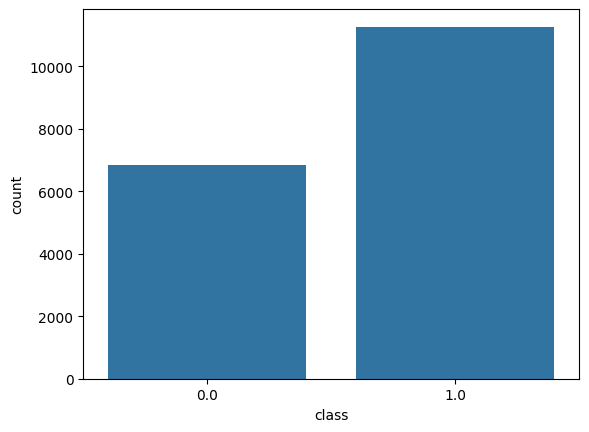

In [5]:
sns.countplot(data=data_politicsall, x='class', order=data['class'].value_counts().index)
plt.show()


In [6]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove punctuation
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english')))
    return preprocessed_text

data_politicsall['text'] = preprocess_text(data_politicsall['text'].values)


[nltk_data] Downloading package punkt to /home/risav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/risav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|████████████████████████████████████████████████████████████████████████████████████████████| 18110/18110 [11:20<00:00, 26.63it/s]


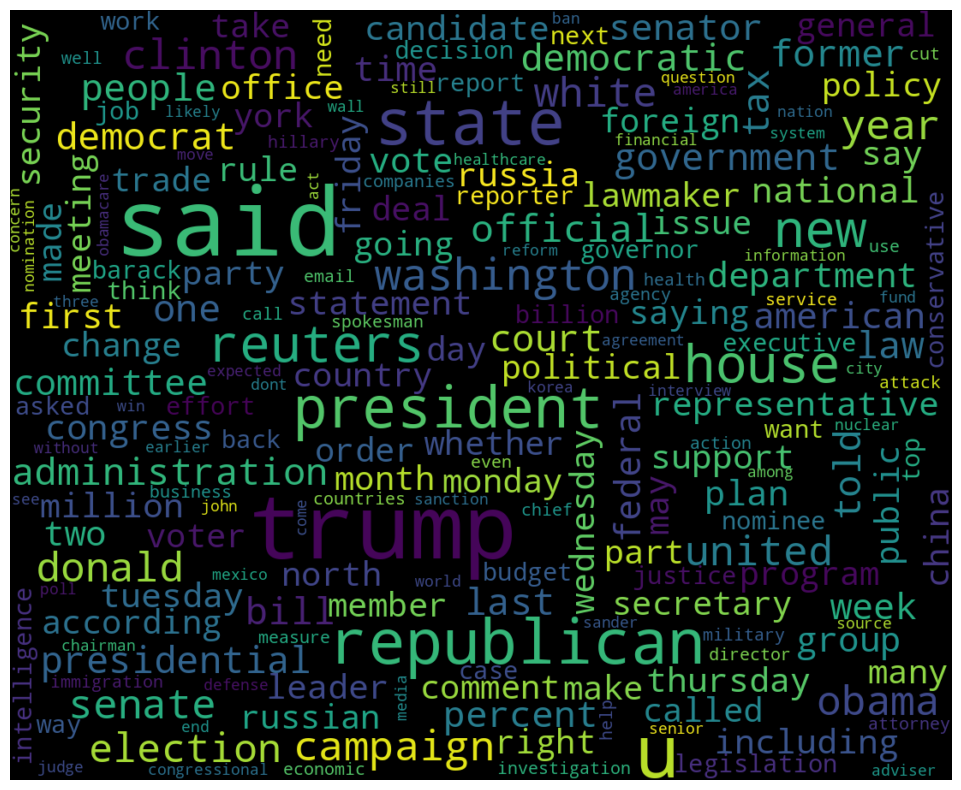

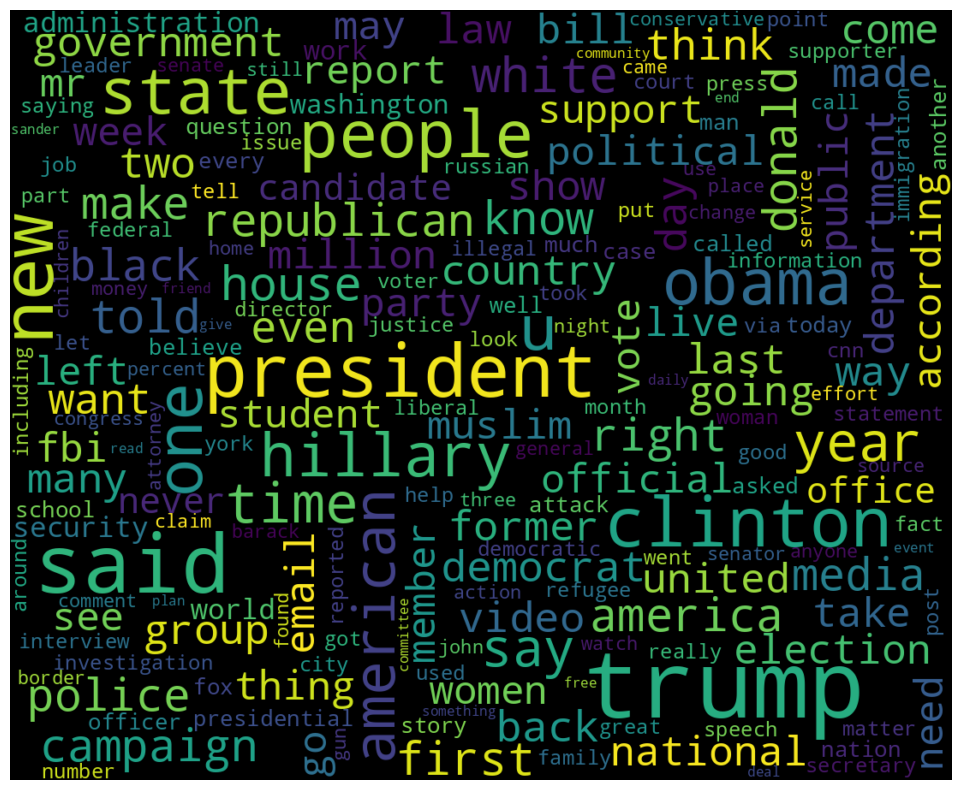

In [7]:
# WordCloud for Real News
consolidated = ' '.join(data_politicsall['text'][data_politicsall['class'] == 1].astype(str))
wordCloud = WordCloud(width=1100, height=900, max_font_size=110, collocations=False).generate(consolidated)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# WordCloud for Fake News
consolidated = ' '.join(data_politicsall['text'][data_politicsall['class'] == 0].astype(str))
wordCloud = WordCloud(width=1100, height=900, max_font_size=110, collocations=False).generate(consolidated)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_politicsall['text'], data_politicsall['class'], test_size=0.25)

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


In [9]:
# Train Logistic Regression
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

# Train Decision Tree Classifier
modelDCT = DecisionTreeClassifier()
modelDCT.fit(x_train, y_train)


DecisionTreeClassifier()

In [10]:
# Accuracy Scores
print("Logistic Regression Training Accuracy:", accuracy_score(y_train, modelLR.predict(x_train)))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, modelLR.predict(x_test)))

print("Decision Tree Training Accuracy:", accuracy_score(y_train, modelDCT.predict(x_train)))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, modelDCT.predict(x_test)))

# Classification Reports
print("Logistic Regression Performance:")
print(classification_report(y_test, modelLR.predict(x_test)))

print("Decision Tree Classifier Performance:")
print(classification_report(y_test, modelDCT.predict(x_test)))


Logistic Regression Training Accuracy: 0.9867471653659254
Logistic Regression Test Accuracy: 0.9796819787985865
Decision Tree Training Accuracy: 0.9999263731409218
Decision Tree Test Accuracy: 0.9931537102473498
Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1673
         1.0       0.98      0.99      0.98      2855

    accuracy                           0.98      4528
   macro avg       0.98      0.98      0.98      4528
weighted avg       0.98      0.98      0.98      4528

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1673
         1.0       0.99      1.00      0.99      2855

    accuracy                           0.99      4528
   macro avg       0.99      0.99      0.99      4528
weighted avg       0.99      0.99      0.99      4528



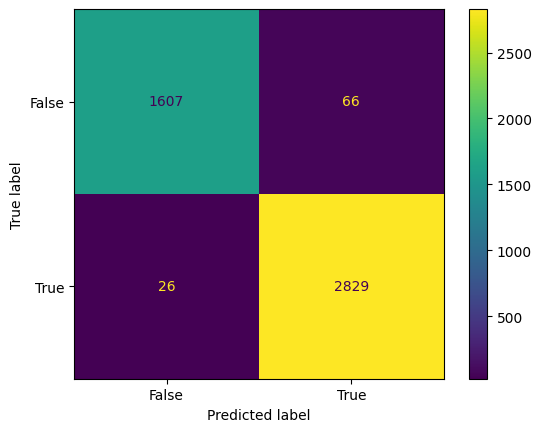

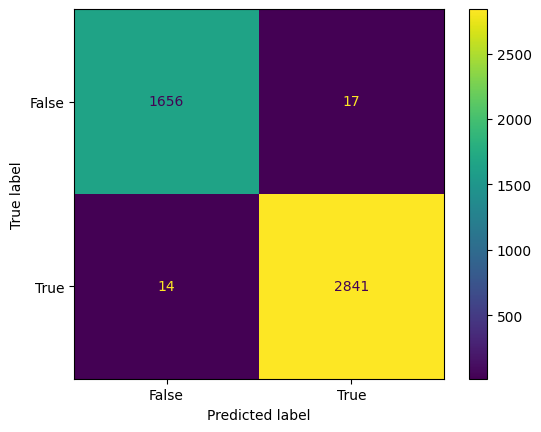

In [11]:
# Logistic Regression Confusion Matrix
cm = confusion_matrix(y_test, modelLR.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()

# Decision Tree Confusion Matrix
cm = confusion_matrix(y_test, modelDCT.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()


Logistic Regression Accuracy on Health News: 0.7494175888177053
Decision Tree Accuracy on Health News: 0.7754076878276063
Logistic Regression Performance on Health News:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     10265
         1.0       0.70      0.01      0.03      3471

    accuracy                           0.75     13736
   macro avg       0.72      0.51      0.44     13736
weighted avg       0.74      0.75      0.65     13736

Decision Tree Performance on Health News:
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     10265
         1.0       0.97      0.11      0.20      3471

    accuracy                           0.78     13736
   macro avg       0.87      0.56      0.54     13736
weighted avg       0.82      0.78      0.70     13736



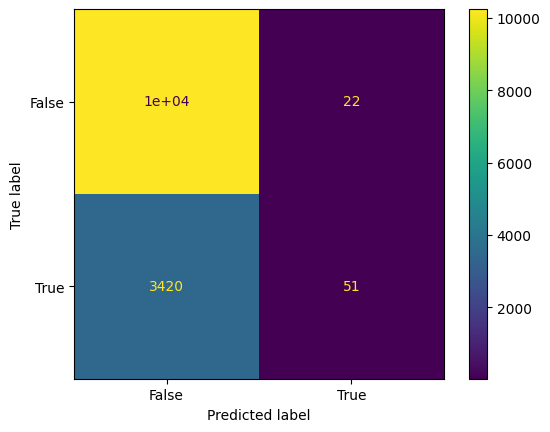

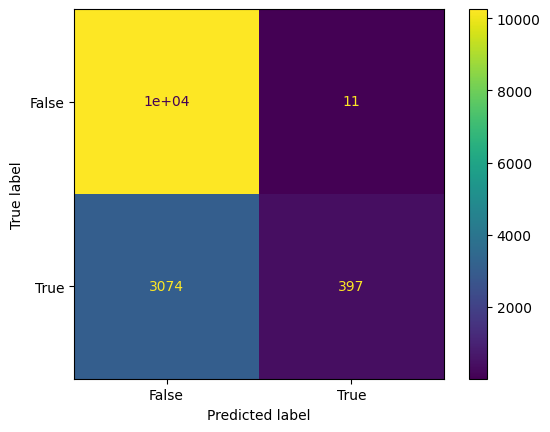

In [12]:
X_test = vectorization.transform(data_healthall['text'])
Y_test = data_healthall['class']

print("Logistic Regression Accuracy on Health News:", accuracy_score(Y_test, modelLR.predict(X_test)))
print("Decision Tree Accuracy on Health News:", accuracy_score(Y_test, modelDCT.predict(X_test)))

print("Logistic Regression Performance on Health News:")
print(classification_report(Y_test, modelLR.predict(X_test)))

print("Decision Tree Performance on Health News:")
print(classification_report(Y_test, modelDCT.predict(X_test)))

# Confusion Matrices for Health News
cm = confusion_matrix(Y_test, modelLR.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()

cm = confusion_matrix(Y_test, modelDCT.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()


In [13]:
input_text = ["Post about a video claims that it is a protest against confinement in the town"]

# Transform input using the same vectorizer
input_data = vectorization.transform(input_text)

# Predict using Logistic Regression
prediction = modelDCT.predict(input_data)

# Output the prediction
print("Prediction:", "Real news" if prediction[0] == 1 else "Fake news")


Prediction: Fake news


In [16]:
import pickle

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorization, vec_file)

# Save trained Logistic Regression model
with open("modelDCT.pkl", "wb") as model_file:
    pickle.dump(modelLR, model_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [17]:
# Load vectorizer
with open("vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)

# Load trained model
with open("modelDCT.pkl", "rb") as model_file:
    model = pickle.load(model_file)

print("Model and vectorizer loaded successfully!")

# Make a sample prediction
sample_text = ["Breaking news: Government announces new policies."]
input_data = vectorizer.transform(sample_text)
prediction = model.predict(input_data)

print("Prediction:", "Real News ✅" if prediction[0] == 1 else "Fake News ❌")


Model and vectorizer loaded successfully!
Prediction: Fake News ❌
